<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/PMT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and enviroment preparation

In [27]:
!pip install lecroyparser

In [28]:
import lecroyparser
import matplotlib.pyplot as plt
import os
import numpy as np

!wget -q https://media.giphy.com/media/yJFeycRK2DB4c/giphy.gif 
from IPython.display import Image

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-dark.zip
#!unzip pmt-1648-dark.zip 

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-spe.zip
#!unzip pmt-1648-spe.zip

In [29]:
# imo it could be smarter to import all data at once, it's just some Mb
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip 
!unzip -q Data.zip # -q flag stands for 'quiet'

--2022-04-06 11:18:33--  https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip [following]
--2022-04-06 11:18:34--  https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13365337 (13M) [application/zip]
Saving to: ‘Data.zip.1’

Data.zip.1          100%[===================>]  12.75M  --.-KB/s    in 0.09s   

2022-04-06 11:18:34 (143 MB/s) - ‘Data.zip.1’ saved [13365337/13365337]

replace __MACOSX/._Data? [y]es,

# 31/03 Data

In [30]:
# dark current data path
path_dark='Data/20220331-PMT/pmt-1648/1648-dark/'
files_dark = os.listdir(path_dark)

# single (?) photoelectron current data path
path_spe='Data/20220331-PMT/pmt-1648/1648-spe/'
files_spe = os.listdir(path_spe)

# impulsator data paths
path_imp7='Data/20220331-PMT/pmt-1648/1648-imp7/'
files_imp7 = os.listdir(path_imp7)

path_imp75='Data/20220331-PMT/pmt-1648/1648-imp7.5/'
files_imp75 = os.listdir(path_imp75)

path_imp8='Data/20220331-PMT/pmt-1648/1648-imp8/'
files_imp8 = os.listdir(path_imp8)

No DS_Store!


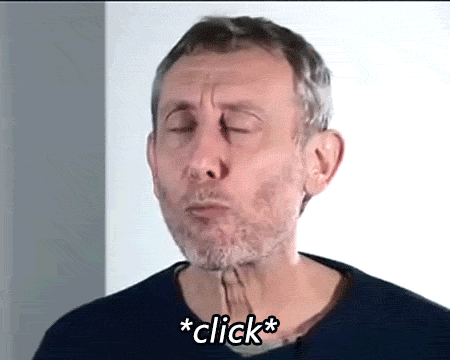

In [31]:
if not ((files_dark=='.DS_Store')&(files_spe=='.DS_Store')&(files_imp7=='.DS_Store')&(files_imp75=='.DS_Store')&(files_imp8=='.DS_Store')): 
    with open('giphy.gif','rb') as f:
        print('No DS_Store!')
        display(Image(data=f.read(), format='png'))

## Dark Current Visualization

In [32]:
from scipy import signal
import numpy as np
peaks = np.zeros(len(files_dark))
peakpos = np.zeros(len(files_dark))
usample=0
t_dark = np.zeros(shape=(len(files_dark), 252))
v_dark = np.zeros(shape=(len(files_dark), 252))
for i,filename in enumerate(files_dark):
    #print(i,filename)
    f = open(path_dark+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_dark[i] = data.x
    v_dark[i] = data.y
    #print(t[i])
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

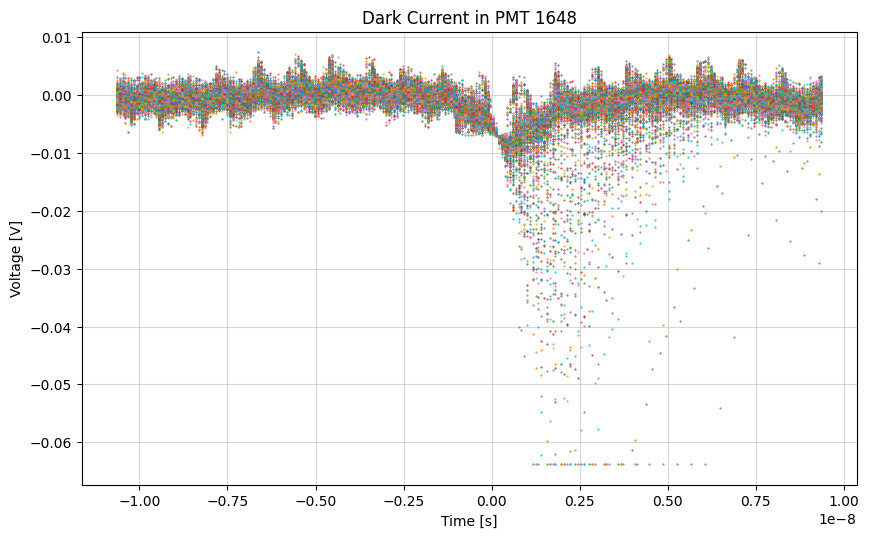

In [33]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Dark Current in PMT 1648')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_dark):
    plt.plot(t_dark[k][80:130], v_dark[k][80:130], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)


## Single (?) Photoelectron Current Visualization

In [34]:
usample=0
peaks = np.zeros(len(files_spe))
peakpos = np.zeros(len(files_spe))
t_spe = np.zeros(shape=(len(files_spe), 127))
v_spe = np.zeros(shape=(len(files_spe), 127))
for i,filename in enumerate(files_spe):
    #print(i,filename)
    f = open(path_spe+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_spe[i] = data.x
    v_spe[i] = data.y

    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

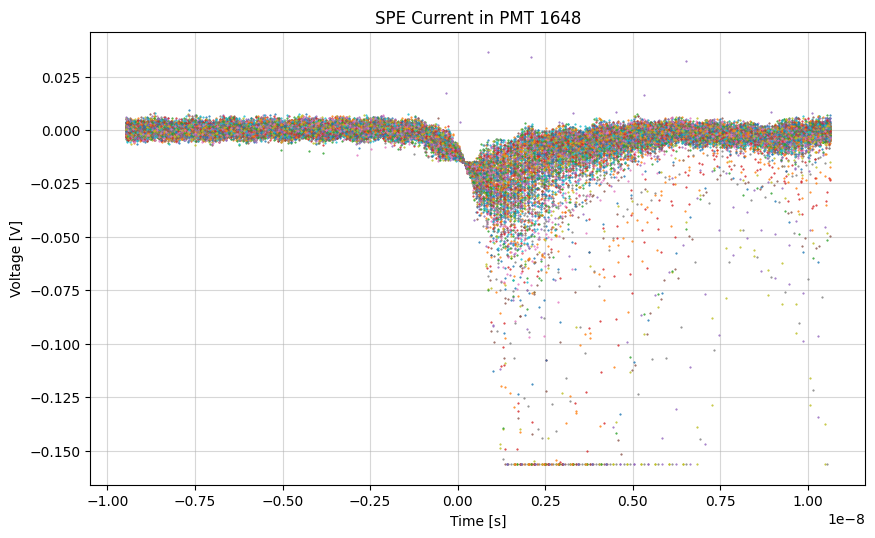

In [35]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('SPE Current in PMT 1648')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_dark):
    plt.plot(t_spe[k][30:80], v_spe[k][30:80], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

## Impulsator Data

### Intensity: 7

In [36]:
usample=0
peaks = np.zeros(len(files_imp7))
peakpos = np.zeros(len(files_imp7))
t_imp7 = np.zeros(shape=(len(files_imp7), 502))
v_imp7 = np.zeros(shape=(len(files_imp7), 502))
for i,filename in enumerate(files_imp7):
    #print(i,filename)
    f = open(path_imp7+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_imp7[i] = data.x
    v_imp7[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

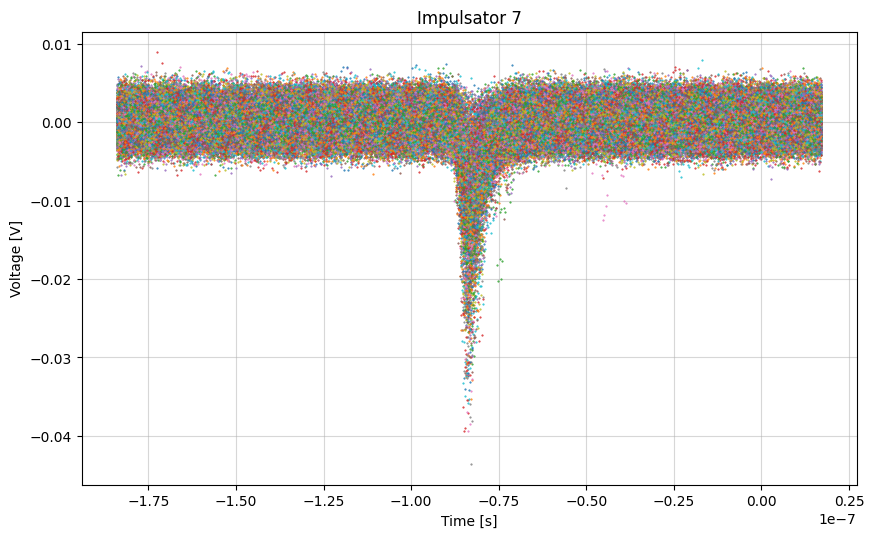

In [37]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 7')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp7):
    plt.plot(t_imp7[k], v_imp7[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity: 7.5

In [38]:
usample=0
peaks = np.zeros(len(files_imp75))
peakpos = np.zeros(len(files_imp75))
t_imp75 = np.zeros(shape=(len(files_imp75), 502))
v_imp75 = np.zeros(shape=(len(files_imp75), 502))
for i,filename in enumerate(files_imp75):
    #print(i,filename)
    f = open(path_imp75+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp75[i] = data.x
    v_imp75[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

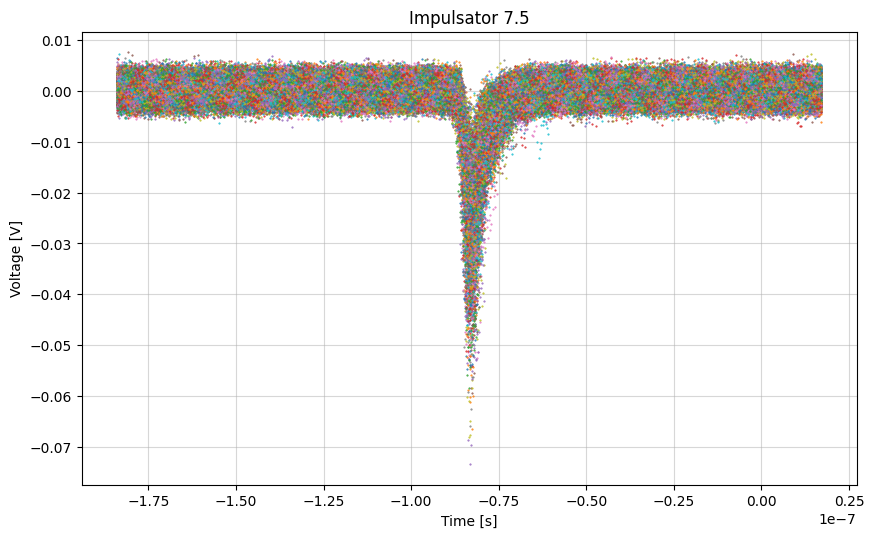

In [39]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 7.5')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp75):
    plt.plot(t_imp75[k], v_imp75[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity: 8

In [40]:
usample=0
peaks = np.zeros(len(files_imp8))
peakpos = np.zeros(len(files_imp8))
t_imp8 = np.zeros(shape=(len(files_imp8), 502))
v_imp8 = np.zeros(shape=(len(files_imp8), 502))
for i,filename in enumerate(files_imp8):
    #print(i,filename)
    f = open(path_imp8+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp8[i] = data.x
    v_imp8[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

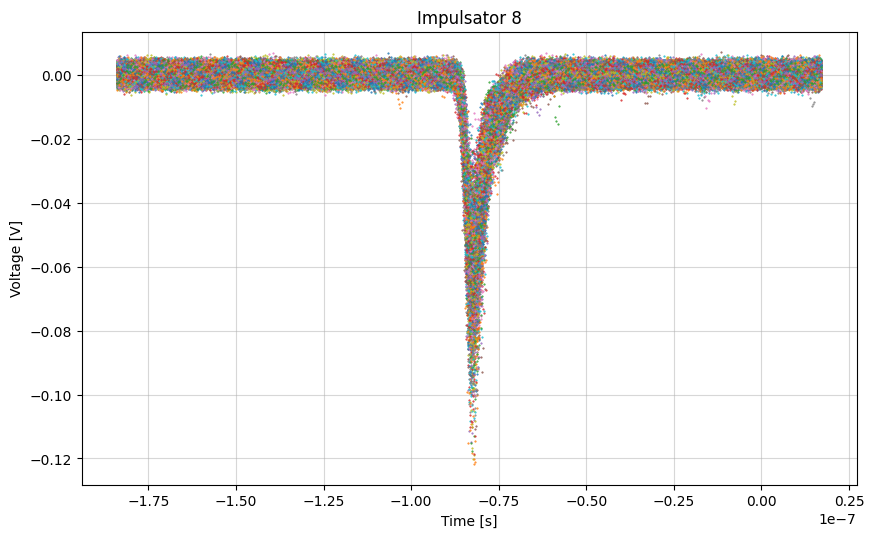

In [41]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 8')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp8):
    plt.plot(t_imp8[k], v_imp8[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

# 05/04 Data

In [42]:
# impulsator data paths
path_imp0='Data/20220405-PMT/pmt-1648/1648-imp0/'
files_imp0 = os.listdir(path_imp0)

path_imp2='Data/20220405-PMT/pmt-1648/1648-imp2/'
files_imp2 = os.listdir(path_imp2)

path_imp3='Data/20220405-PMT/pmt-1648/1648-imp3/'
files_imp3 = os.listdir(path_imp3)

path_imp4='Data/20220405-PMT/pmt-1648/1648-imp4/'
files_imp4 = os.listdir(path_imp4)

path_imp45='Data/20220405-PMT/pmt-1648/1648-imp4.5/'
files_imp45 = os.listdir(path_imp45)

path_imp5='Data/20220405-PMT/pmt-1648/1648-imp5/'
files_imp5 = os.listdir(path_imp5)

path_imp55='Data/20220405-PMT/pmt-1648/1648-imp5.5/'
files_imp55 = os.listdir(path_imp55)

path_imp6='Data/20220405-PMT/pmt-1648/1648-imp6/'
files_imp6 = os.listdir(path_imp6)

path_imp65='Data/20220405-PMT/pmt-1648/1648-imp6.5/'
files_imp65 = os.listdir(path_imp65)

No DS_Store!


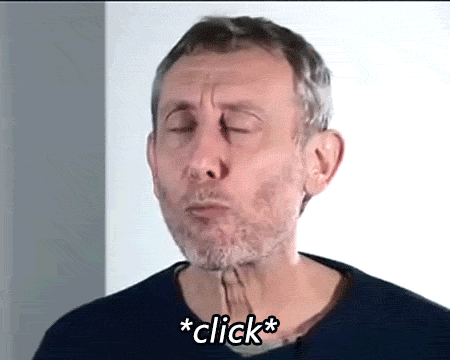

In [43]:
files = {0: files_imp0, 2: files_imp2, 3: files_imp3, 4: files_imp4, 45: files_imp45, 5: files_imp5, 55: files_imp55, 6: files_imp6, 65: files_imp65}
paths = {0: path_imp0, 2: path_imp2, 3: path_imp3, 4: path_imp4, 45: path_imp45, 5: path_imp5, 55: path_imp55, 6: path_imp6, 65: path_imp65}
flag = 0
for i in files:
    if (files=='.DS_Store'): flag+=1

if(flag==0):
    with open('giphy.gif','rb') as f:
        print('No DS_Store!')
        display(Image(data=f.read(), format='png'))

### Intensity: 0

In [44]:
usample=0
peaks = np.zeros(len(files_imp0))
peakpos = np.zeros(len(files_imp0))
t_imp0 = np.zeros(shape=(len(files_imp0), 502))
v_imp0 = np.zeros(shape=(len(files_imp0), 502))
for i,filename in enumerate(files_imp0):
    #print(i,filename)
    f = open(path_imp0+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp0[i] = data.x
    v_imp0[i] = data.y
  
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

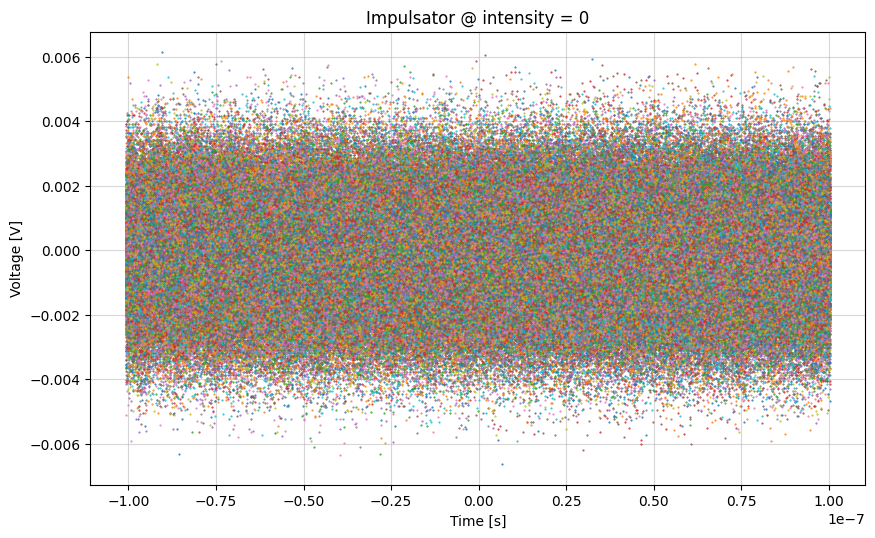

In [45]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator @ intensity = 0')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp0):
    plt.plot(t_imp0[k], v_imp0[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity at request

which intensity would you like me to show? 
 Write a number: 
0


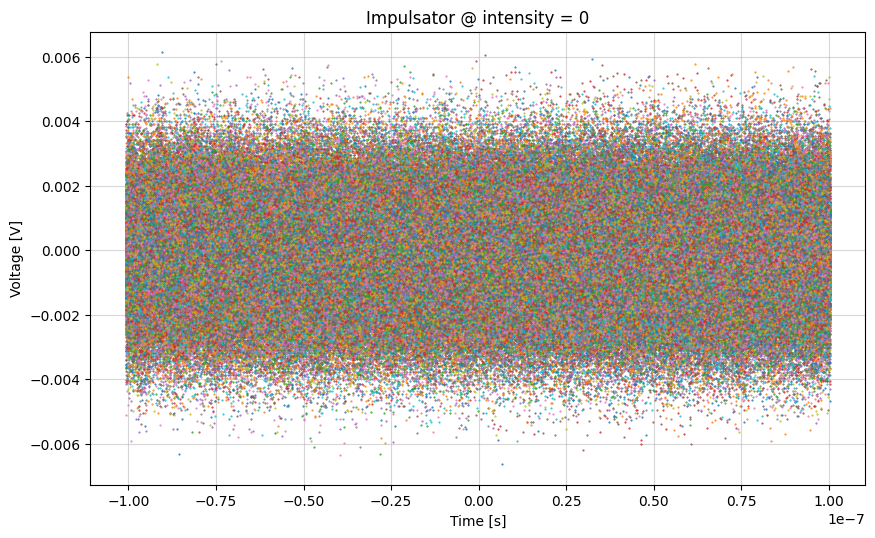

In [46]:
print('which intensity would you like me to show? \n Write a number: ')
a = int(input())
#files_imp = f'files_imp_{a}'
#path_imp = f'path_imp_{a}'
#print(files_imp, path_imp)
usample=0
#peaks = np.zeros(len(files[a]))
#peakpos = np.zeros(len(files[a]))
t_imp = np.zeros(shape=(len(files[a]), 502))
v_imp = np.zeros(shape=(len(files[a]), 502))
for i,filename in enumerate(files[a]):
    #print(i,filename)
    f = open(paths[a]+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp[i] = data.x
    v_imp[i] = data.y

    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Impulsator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files[a]):
    plt.plot(t_imp[k], v_imp[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

## Analisi del rumore

-8.539580757695428e-05 9.359850628539941e-05
-1.7147478390395802e-11 9.117321958310026e-12


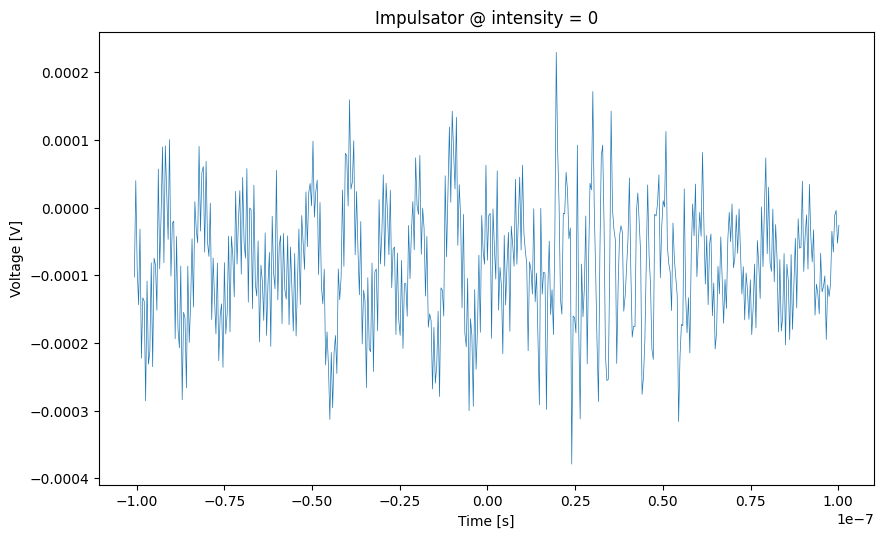

In [47]:
t=np.zeros(len(t_imp[0]))
v=np.zeros(len(t_imp[0]))
charge = np.zeros(len(t_imp[:,0]))
delta = (np.max(t_imp[0])-np.min(t_imp[0]))/len(t_imp[0])

for i in range(len(t_imp[:,0])):
  t+=t_imp[i]/len(t_imp[:,0])
  v+=v_imp[i]/len(t_imp[:,0])
  charge[i] = np.sum(v_imp[i])*delta



plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Impulsator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

plt.plot(t, v, '-', linewidth=.5, markersize=1, label=filename)

mean_noise= np.mean(v)
RMS_noise = np.std(v)

mean_charge = np.mean(charge)
RMS_charge = np.std(charge)

print(mean_noise, RMS_noise)
print(mean_charge, RMS_charge) #questo RMS è quello che useremo per il metodo P.I.N.C.I. (credo)